In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('C:/Users/Katerina/Downloads/01 Call-Center-Dataset.xlsx')
data

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


In [22]:
data.shape


(5000, 10)

In [15]:
data.isna().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

In [36]:
# Handle missing values by filling with the mean
data.fillna(data.mean(numeric_only=True), inplace=True)
print("\nHandled missing values by replacing with mean.")


Handled missing values by replacing with mean.


In [38]:
def convert_time(row):
    '''Return average talk duration as seconds'''
    return pd.Timedelta(hours=row.hour,minutes=row.minute,seconds=row.second).total_seconds() if pd.notnull(row) else None

In [40]:
#confirm how it works
data.AvgTalkDuration.apply(lambda x: convert_time(x))

0       143.0
1       242.0
2       131.0
3        37.0
4        60.0
        ...  
4995    340.0
4996    196.0
4997    109.0
4998     58.0
4999      NaN
Name: AvgTalkDuration, Length: 5000, dtype: float64

In [42]:
#apply total seconds function
data['AvgTalkDuration'] = data.AvgTalkDuration.apply(lambda x: convert_time(x))
data.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,143.0,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,242.0,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,131.0,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,37.0,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,60.0,3.0


In [56]:
# Check available dates in the dataset
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    print("\nAvailable Dates in the Dataset:\n")
    print(data['Date'].unique())


Available Dates in the Dataset:

<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00', '2021-01-11 00:00:00', '2021-01-12 00:00:00',
 '2021-01-13 00:00:00', '2021-01-14 00:00:00', '2021-01-15 00:00:00',
 '2021-01-16 00:00:00', '2021-01-17 00:00:00', '2021-01-18 00:00:00',
 '2021-01-19 00:00:00', '2021-01-20 00:00:00', '2021-01-21 00:00:00',
 '2021-01-22 00:00:00', '2021-01-23 00:00:00', '2021-01-24 00:00:00',
 '2021-01-25 00:00:00', '2021-01-26 00:00:00', '2021-01-27 00:00:00',
 '2021-01-28 00:00:00', '2021-01-29 00:00:00', '2021-01-30 00:00:00',
 '2021-01-31 00:00:00', '2021-02-01 00:00:00', '2021-02-02 00:00:00',
 '2021-02-03 00:00:00', '2021-02-04 00:00:00', '2021-02-05 00:00:00',
 '2021-02-06 00:00:00', '2021-02-07 00:00:00', '2021-02-08 00:00:00',
 '2021-02-09 00:00:00', '2021-02-10 00:0

In [50]:
#confirm call response status
data['Answered (Y/N)'].value_counts()
# Visualize key aspects (example visualizations)

Answered (Y/N)
Y    4054
N     946
Name: count, dtype: int64

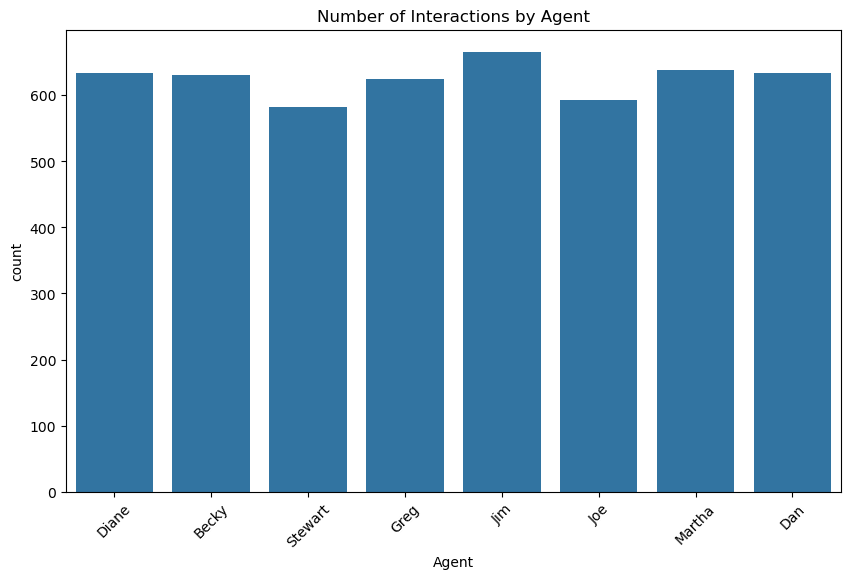

In [46]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Agent', data=data)  # Replace 'Agent' with an actual categorical column
plt.title("Number of Interactions by Agent")
plt.xticks(rotation=45)
plt.show()

In [63]:
# Example: Analyze resolution time by agent
resolution_by_agent = data.groupby('Agent')['AvgTalkDuration'].mean().sort_values()
print("Average Resolution Time by Agent:\n", resolution_by_agent)

Average Resolution Time by Agent:
 Agent
Diane      218.954092
Becky      220.009671
Martha     223.725681
Joe        224.101240
Stewart    226.205451
Greg       226.802789
Jim        228.113806
Dan        231.189293
Name: AvgTalkDuration, dtype: float64


In [71]:
#average satisfaction rating by agent
for agent in data.Agent.unique():
    print('{}: \n Calls:{}, Average rating: {}'.format(agent,data[data.Agent==agent].shape[0],data[data.Agent==agent]['Satisfaction rating'].mean()))

Diane: 
 Calls:633, Average rating: 3.4048481362584573
Becky: 
 Calls:631, Average rating: 3.3771868992061997
Stewart: 
 Calls:582, Average rating: 3.400984475898396
Greg: 
 Calls:624, Average rating: 3.404220111823714
Jim: 
 Calls:666, Average rating: 3.3955882374727957
Joe: 
 Calls:593, Average rating: 3.343991860307435
Martha: 
 Calls:638, Average rating: 3.4577436581077086
Dan: 
 Calls:633, Average rating: 3.439795774422859
